# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None 
pd.options.display.float_format = '{:.6f}'.format
import random
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
file=files.upload()

Saving com_res_final copy.xlsx to com_res_final copy.xlsx


In [ ]:
df=pd.read_excel('com_res_final copy.xlsx')
df.head()

,Product,Sub-product,Issue,Company,Submitted via,Timely response?,Company response to consumer,Regions,Duration
0,Credit card or prepaid card,General purpose card,Advertising and marketing,AMERICAN EXPRESS COMPANY,Web,Yes,Closed with monetary relief,Northeast,0
1,Bank account or service,Checking account,"Account opening, closing, or management","MUFG UNION BANK, NATIONAL ASSOCIATION",Referral,Yes,Closed with monetary relief,West,1
2,Loan reports,Credit reporting,Credit Report/score,Garcadia Financial LLC,Web,Yes,Closed with monetary relief,Southwest,0
3,Bank account or service,Checking account,"Account opening, closing, or management",WELLS FARGO & COMPANY,Web,Yes,Closed with monetary relief,West,0
4,Credit card or prepaid card,General purpose card,Wrong amount charged or received,CAPITAL ONE FINANCIAL CORPORATION,Web,Yes,Closed with monetary relief,West,0


In [ ]:
l=['Product','Submitted via','Timely response?','Regions','Company response to consumer']

In [ ]:
for i in l:
  df[i]=df[i].factorize()[0]

In [ ]:
df.head()

,Product,Sub-product,Issue,Company,Submitted via,Timely response?,Company response to consumer,Regions,Duration
0,0,General purpose card,Advertising and marketing,AMERICAN EXPRESS COMPANY,0,0,0,0,0
1,1,Checking account,"Account opening, closing, or management","MUFG UNION BANK, NATIONAL ASSOCIATION",1,0,0,1,1
2,2,Credit reporting,Credit Report/score,Garcadia Financial LLC,0,0,0,2,0
3,1,Checking account,"Account opening, closing, or management",WELLS FARGO & COMPANY,0,0,0,1,0
4,0,General purpose card,Wrong amount charged or received,CAPITAL ONE FINANCIAL CORPORATION,0,0,0,1,0


In [ ]:
l1=['Sub-product','Issue','Company']

In [ ]:
for i in l1:
  d=(df.groupby(i).size()) / len(df)
  df[i]=df[i].apply(lambda x : d[x])

In [ ]:
df.head()

,Product,Sub-product,Issue,Company,Submitted via,Timely response?,Company response to consumer,Regions,Duration
0,0,0.203861,0.009487,0.020869,0,0,0,0,0
1,1,0.171314,0.136881,0.000970,1,0,0,1,1
2,2,0.179246,0.129541,0.000045,0,0,0,2,0
3,1,0.171314,0.136881,0.061186,0,0,0,1,0
4,0,0.203861,0.040893,0.031622,0,0,0,1,0


In [ ]:
X=df.drop('Company response to consumer',axis=1)
y=df['Company response to consumer']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.25,stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (83487, 8)
y_train (83487,)
X_test (27829, 8)
y_test (27829,)


# Base Model - RF

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model_fac = rf_classification.fit(X_train, y_train)

In [ ]:
y_pred=rf_model_fac.predict(X_test)
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion_matrix: [[11836  2078]
 [ 3340 10575]]
0.8053110065040067
0.7960704607046072
0.7599712540424003
              precision    recall  f1-score   support

           0       0.78      0.85      0.81     13914
           1       0.84      0.76      0.80     13915

    accuracy                           0.81     27829
   macro avg       0.81      0.81      0.80     27829
weighted avg       0.81      0.81      0.80     27829



Text(0.5, 15.0, 'Confusion Matrix')

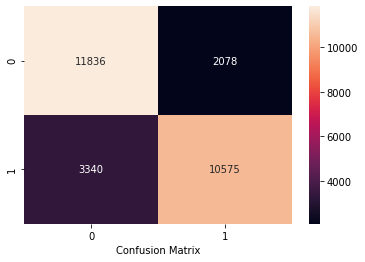

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train=rf_model_fac.predict(X_train)
print('confusion_matrix:',confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))
print(f1_score(y_train,y_pred_train))
print(recall_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

confusion_matrix: [[39732  2010]
 [ 4742 37003]]
0.9191251332542791
0.9163921840560688
0.8864055575518026
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     41742
           1       0.95      0.89      0.92     41745

    accuracy                           0.92     83487
   macro avg       0.92      0.92      0.92     83487
weighted avg       0.92      0.92      0.92     83487



Text(0.5, 15.0, 'Confusion Matrix')

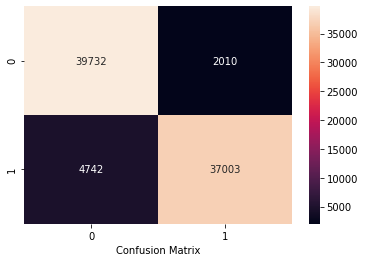

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

# Base Model - XGB

In [ ]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=xgb_model.predict(X_test)
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion_matrix:
 [[12248  1666]
 [ 3037 10878]]
0.8310036293075569
0.8222532975547073
0.7817463169241825
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     13914
           1       0.87      0.78      0.82     13915

    accuracy                           0.83     27829
   macro avg       0.83      0.83      0.83     27829
weighted avg       0.83      0.83      0.83     27829



Text(0.5, 15.0, 'Confusion Matrix')

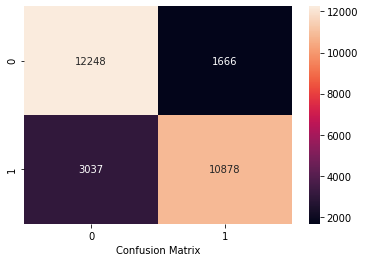

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train=xgb_model.predict(X_train)
print('confusion_matrix:\n',confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))
print(f1_score(y_train,y_pred_train))
print(recall_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

confusion_matrix:
 [[38069  3673]
 [ 7704 34041]]
0.8637272868829877
0.8568192401112523
0.8154509522098455
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     41742
           1       0.90      0.82      0.86     41745

    accuracy                           0.86     83487
   macro avg       0.87      0.86      0.86     83487
weighted avg       0.87      0.86      0.86     83487



Text(0.5, 15.0, 'Confusion Matrix')

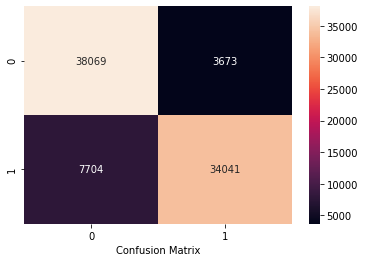

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

# Forward selection - XGB

In [ ]:
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(XGBClassifier(n_jobs=-1,
           random_state=20,max_depth=10,gamma=1),
           k_features='best',
           forward=True,
           verbose=2,
           scoring='f1',
           cv=5)
           
xgfselector = forward_feature_selector.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min finished

[2021-06-22 16:12:21] Features: 1/8 -- score: 0.8021768280555275[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min finished

[2021-06-22 16:14:10] Features: 2/8 -- score: 0.8111639936587606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.4min finished

[2021-06-22 16:16:35] Features: 3/8 -- score: 0.8255679152742083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
xgfselector.k_feature_names_

('Product',
 'Sub-product',
 'Issue',
 'Company',
 'Submitted via',
 'Timely response?')

# XGB base model with forward selection features

In [ ]:
X_fs_xgb=X[['Product', 'Sub-product', 'Issue', 'Company', 'Submitted via', 'Timely response?']]

In [ ]:
X_train_xfs, X_test_xfs, y_train_xfs, y_test_xfs = train_test_split(X_fs_xgb, y, random_state = 10, test_size = 0.25,stratify=y)
print('X_train', X_train_xfs.shape)
print('y_train', y_train_xfs.shape)
print('X_test', X_test_xfs.shape)
print('y_test', y_test_xfs.shape)

X_train (83487, 6)
y_train (83487,)
X_test (27829, 6)
y_test (27829,)


In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_fs, y_train_fs)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_fs=xgb_model.predict(X_test_fs)
print('confusion_matrix:',confusion_matrix(y_test_fs,y_pred_fs))
print(accuracy_score(y_test_fs,y_pred_fs))
print(f1_score(y_test_fs,y_pred_fs))
print(recall_score(y_test_fs,y_pred_fs))
print(classification_report(y_test_fs,y_pred_fs))

confusion_matrix: [[11640  2274]
 [ 2926 10989]]
0.8131445614287254
0.8086687762160569
0.7897233201581028
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     13914
           1       0.83      0.79      0.81     13915

    accuracy                           0.81     27829
   macro avg       0.81      0.81      0.81     27829
weighted avg       0.81      0.81      0.81     27829



Text(0.5, 15.0, 'Confusion Matrix')

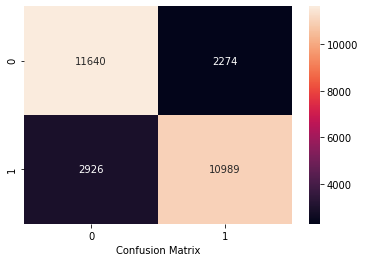

In [ ]:
sns.heatmap(confusion_matrix(y_test_fs,y_pred_fs),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train_fs=xgb_model.predict(X_train_fs)
print('confusion_matrix:',confusion_matrix(y_train_fs,y_pred_train_fs))
print(accuracy_score(y_train_fs,y_pred_train_fs))
print(f1_score(y_train_fs,y_pred_train_fs))
print(recall_score(y_train_fs,y_pred_train_fs))
print(classification_report(y_train_fs,y_pred_train_fs))

confusion_matrix: [[34784  6958]
 [ 8401 33344]]
0.816031238396397
0.812802418126196
0.7987543418373458
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     41742
           1       0.83      0.80      0.81     41745

    accuracy                           0.82     83487
   macro avg       0.82      0.82      0.82     83487
weighted avg       0.82      0.82      0.82     83487



Text(0.5, 15.0, 'Confusion Matrix')

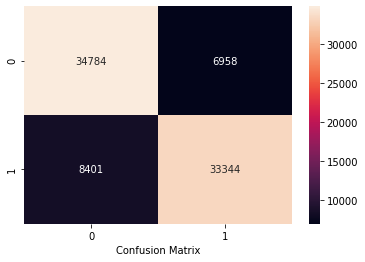

In [ ]:
sns.heatmap(confusion_matrix(y_train_fs,y_pred_train_fs),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

# Grid Search -XGB


In [ ]:
xgb_model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_model.fit(X_train_xfs, y_train_xfs)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_pred=xgb_model.predict(X_test_xfs)
print('confusion_matrix:',confusion_matrix(y_test_xfs,y_pred))
print(accuracy_score(y_test_xfs,y_pred))
print(f1_score(y_test_xfs,y_pred))
print(recall_score(y_test_xfs,y_pred))
print(classification_report(y_test_xfs,y_pred))

confusion_matrix: [[12359  1555]
 [ 3110 10805]]
0.8323691113586547
0.8224548049476689
0.776500179662235
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     13914
           1       0.87      0.78      0.82     13915

    accuracy                           0.83     27829
   macro avg       0.84      0.83      0.83     27829
weighted avg       0.84      0.83      0.83     27829



In [ ]:
param_test1 = {
 'max_depth':range(3,15,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='precision',n_jobs=-1, cv=5,verbose=1)
gsearch1.fit(X_train_xfs, y_train_xfs) 
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 38.3min finished


({'max_depth': 5, 'min_child_weight': 5}, 0.8769225754128204)

In [ ]:
# ({'max_depth': 5, 'min_child_weight': 5}, 0.8769225754128204)

In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=500, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='precision',n_jobs=-1, cv=5,verbose=2)
gsearch2.fit(X_train_xfs, y_train_xfs)
gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 11.7min finished


({'max_depth': 5, 'min_child_weight': 4}, 0.876988871011781)

In [ ]:
# ({'max_depth': 5, 'min_child_weight': 4}, 0.876988871011781)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='precision',n_jobs=-1,cv=5,verbose=1)
gsearch3.fit(X_train_xfs, y_train_xfs)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.5min finished


({'gamma': 0.2}, 0.877815315824909)

In [ ]:
# ({'gamma': 0.2}, 0.877815315824909)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=4, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='precision',n_jobs=-1,cv=5,verbose=1)
gsearch4.fit(X_train_xfs, y_train_xfs)
gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 20.4min finished


({'colsample_bytree': 0.6, 'subsample': 0.7}, 0.8781789131299291)

In [ ]:
# ({'colsample_bytree': 0.6, 'subsample': 0.7}, 0.8781789131299291)

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(65,80,5)],
 'colsample_bytree':[i/100.0 for i in range(55,70,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=4, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='precision',n_jobs=-1,cv=5,verbose=1)
gsearch5.fit(X_train_xfs, y_train_xfs)
gsearch5.best_params_,gsearch5.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 10.4min finished


({'colsample_bytree': 0.55, 'subsample': 0.75}, 0.8782299691035792)

In [ ]:
# ({'colsample_bytree': 0.55, 'subsample': 0.75}, 0.8782299691035792)

In [ ]:
gsearch5.best_score_

0.8782299691035792

In [ ]:
param_test6 = {
'n_estimators':[250,500,750,1000],
'learning_rate':[0.05,0.01,0.1,0.15,0.2]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=4, gamma=0.2, subsample=0.75, colsample_bytree=0.55,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='precision',n_jobs=-1,cv=5,verbose=1)
gsearch6.fit(X_train_xfs, y_train_xfs)
gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.9min finished


({'learning_rate': 0.2, 'n_estimators': 500}, 0.8799901524678605)

In [ ]:
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.2, 'n_estimators': 500}, 0.8799901524678605)

In [ ]:
# ({'learning_rate': 0.2, 'n_estimators': 500}

# Final Model

In [ ]:
xgb_model = XGBClassifier(learning_rate =0.2, n_estimators=500, max_depth=5,
 min_child_weight=4, gamma=0.2, subsample=0.75, colsample_bytree=0.55,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb_model.fit(X_train_xfs, y_train_xfs)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.75, verbosity=1)

In [ ]:
y_pred_xfs=xgb_model.predict(X_test_xfs)
print('confusion_matrix:',confusion_matrix(y_test_xfs,y_pred_xfs))
print(accuracy_score(y_test_xfs,y_pred_xfs))
print(f1_score(y_test_xfs,y_pred_xfs))
print(recall_score(y_test_xfs,y_pred_xfs))
print(classification_report(y_test_xfs,y_pred_xfs))

confusion_matrix: [[12428  1486]
 [ 3178 10737]]
0.8324050450968414
0.8215624760884536
0.7716133668702838
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     13914
           1       0.88      0.77      0.82     13915

    accuracy                           0.83     27829
   macro avg       0.84      0.83      0.83     27829
weighted avg       0.84      0.83      0.83     27829



Text(0.5, 15.0, 'Confusion Matrix')

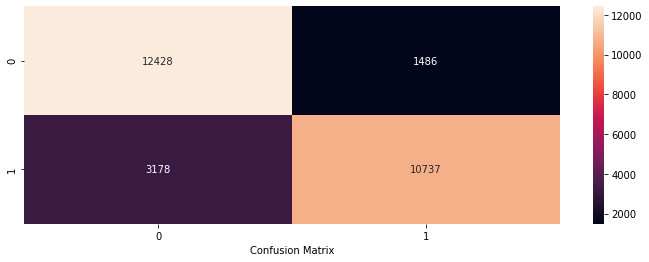

In [ ]:
sns.heatmap(confusion_matrix(y_test_xfs,y_pred_xfs),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train_xfs=xgb_model.predict(X_train_xfs)
print('confusion_matrix:',confusion_matrix(y_train_xfs,y_pred_train_xfs))
print(accuracy_score(y_train_xfs,y_pred_train_xfs))
print(f1_score(y_train_xfs,y_pred_train_xfs))
print(recall_score(y_train_xfs,y_pred_train_xfs))
print(classification_report(y_train_xfs,y_pred_train_xfs))

confusion_matrix: [[37684  4058]
 [ 8917 32828]]
0.8445865823421611
0.8349887448970507
0.7863935800694694
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     41742
           1       0.89      0.79      0.83     41745

    accuracy                           0.84     83487
   macro avg       0.85      0.84      0.84     83487
weighted avg       0.85      0.84      0.84     83487



Text(0.5, 15.0, 'Confusion Matrix')

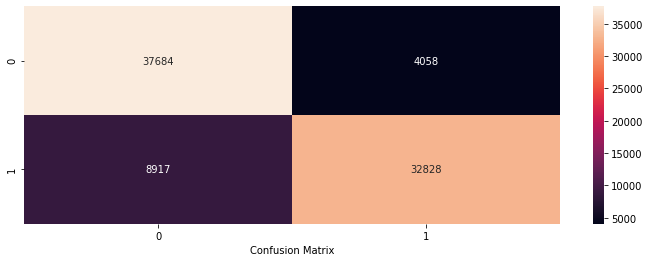

In [ ]:
sns.heatmap(confusion_matrix(y_train_xfs,y_pred_train_xfs),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
# Pred proba

In [ ]:
y_pred=xgb_model.predict(X_test_xfs)
y_pred_proba_test=xgb_model.predict_proba(X_test_xfs)
y_pred1=[1 if x<=0.43 else 0 for x in y_pred_proba_test[:,0]]
print('confusion_matrix:\n',confusion_matrix(y_test_xfs,y_pred))
print('confusion_matrix_proba:\n',confusion_matrix(y_test_xfs,y_pred1))
print(accuracy_score(y_test_xfs,y_pred))
print(f1_score(y_test_xfs,y_pred))
print(recall_score(y_test_xfs,y_pred))
print(classification_report(y_test_xfs,y_pred))
print(classification_report(y_test_xfs,y_pred1))

confusion_matrix:
 [[12393  1521]
 [ 3135 10780]]
confusion_matrix_proba:
 [[12787  1127]
 [ 3535 10380]]
0.8326925150023357
0.8223985352456514
0.7747035573122529
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     13914
           1       0.88      0.77      0.82     13915

    accuracy                           0.83     27829
   macro avg       0.84      0.83      0.83     27829
weighted avg       0.84      0.83      0.83     27829

              precision    recall  f1-score   support

           0       0.78      0.92      0.85     13914
           1       0.90      0.75      0.82     13915

    accuracy                           0.83     27829
   macro avg       0.84      0.83      0.83     27829
weighted avg       0.84      0.83      0.83     27829



In [ ]:
(1127)/(1127+12787)

0.08099755641799626

In [ ]:
3535/(3535+10380)

0.25404240028745956

In [ ]:
y_pred.round(2)

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
y_pred_proba_test[:,0]

array([0.01228225, 0.88596064, 0.01245594, ..., 0.3221171 , 0.8530683 ,
       0.81035614], dtype=float32)

Text(0.5, 15.0, 'Confusion Matrix')

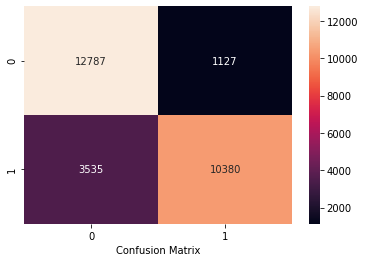

In [ ]:
sns.heatmap(confusion_matrix(y_test_xfs,y_pred1),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train=xgb_model.predict(X_train_xfs)
print('confusion_matrix:',confusion_matrix(y_train_xfs,y_pred_train))
print(accuracy_score(y_train_xfs,y_pred_train))
print(f1_score(y_train_xfs,y_pred_train))
print(recall_score(y_train_xfs,y_pred_train))
print(classification_report(y_train_xfs,y_pred_train))


confusion_matrix: [[37624  4118]
 [ 8652 33093]]
0.8470420544515913
0.8382643497644258
0.7927416457060725
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     41742
           1       0.89      0.79      0.84     41745

    accuracy                           0.85     83487
   macro avg       0.85      0.85      0.85     83487
weighted avg       0.85      0.85      0.85     83487



Text(0.5, 15.0, 'Confusion Matrix')

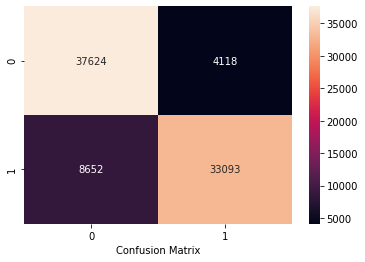

In [ ]:
sns.heatmap(confusion_matrix(y_train_xfs,y_pred_train),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
important_features = pd.DataFrame({'Features': X_train_xfs.columns,'Importance': xgb_model.feature_importances_}) 
fe_imp=important_features.sort_values(by='Importance',ascending=False)

In [ ]:
fe_imp

,Features,Importance
0,Product,0.488457
1,Sub-product,0.271303
3,Company,0.108958
2,Issue,0.097758
4,Submitted via,0.018782
5,Timely response?,0.014742


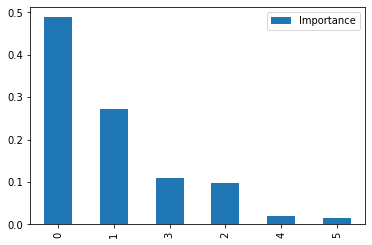

In [ ]:
fe_imp.plot(kind = 'bar')

In [ ]:
x = fe_imp['Features']
y = fe_imp['Importance']

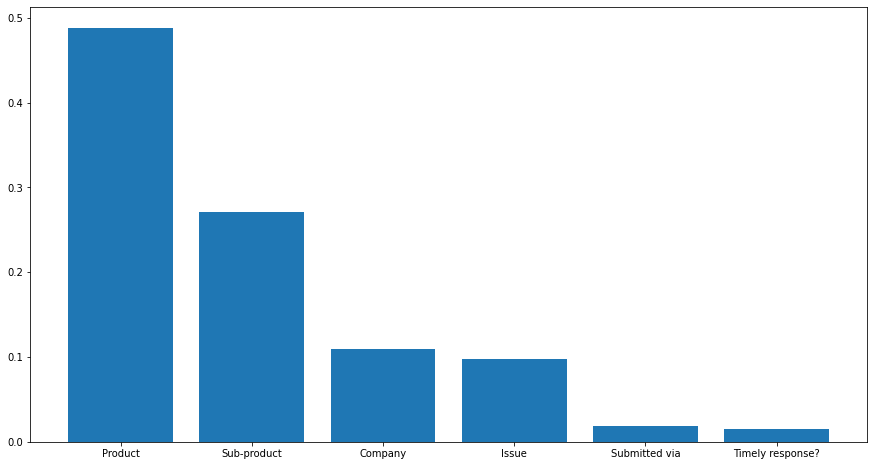

In [ ]:
plt.figure(figsize = [15,8])
plt.bar(x,y)
plt.show()

# FORWARD SELECTION - RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1,random_state=10,n_estimators=10),
           k_features='best',
           forward=True,
           verbose=2,
           scoring='f1',
           cv=5)
           
fselector = forward_feature_selector.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.7s finished

[2021-06-22 16:08:32] Features: 1/8 -- score: 0.8023947172129529[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.9s finished

[2021-06-22 16:08:44] Features: 2/8 -- score: 0.8202692040548627[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.6s finished

[2021-06-22 16:08:57] Features: 3/8 -- score: 0.8221713251377276[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
fselector.k_feature_names_

('Product', 'Issue', 'Company')

# RF base model with forward selection features

In [ ]:
X_fs_rf=X[['Product', 'Issue', 'Company']]

In [ ]:
X_train_fs_rf, X_test_fs_rf, y_train_fs_rf, y_test_fs_rf = train_test_split(X_fs_rf, y, random_state = 10, test_size = 0.25,stratify=y)
print('X_train', X_train_fs_rf.shape)
print('y_train', y_train_fs_rf.shape)
print('X_test', X_test_fs_rf.shape)
print('y_test', y_test_fs_rf.shape)

X_train (83487, 3)
y_train (83487,)
X_test (27829, 3)
y_test (27829,)


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_fs_rf, y_train_fs_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_fs_rf=rf_model.predict(X_test_fs_rf)
print('confusion_matrix:',confusion_matrix(y_test_fs_rf,y_pred_fs_rf))
print(accuracy_score(y_test_fs_rf,y_pred_fs_rf))
print(f1_score(y_test_fs_rf,y_pred_fs_rf))
print(recall_score(y_test_fs_rf,y_pred_fs_rf))
print(classification_report(y_test_fs_rf,y_pred_fs_rf))

confusion_matrix: [[12320  1594]
 [ 3183 10732]]
0.8283445326817349
0.8179566327502762
0.7712540424002875
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     13914
           1       0.87      0.77      0.82     13915

    accuracy                           0.83     27829
   macro avg       0.83      0.83      0.83     27829
weighted avg       0.83      0.83      0.83     27829



Text(0.5, 15.0, 'Confusion Matrix')

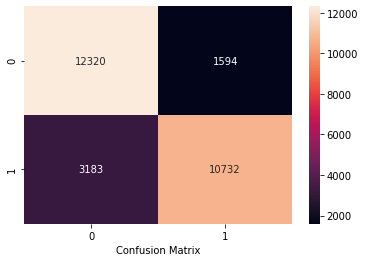

In [ ]:
sns.heatmap(confusion_matrix(y_test_fs_rf,y_pred_fs_rf),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

In [ ]:
y_pred_train_fs_rf=rf_model.predict(X_train_fs_rf)
print('confusion_matrix:',confusion_matrix(y_train_fs_rf,y_pred_train_fs_rf))
print(accuracy_score(y_train_fs_rf,y_pred_train_fs_rf))
print(f1_score(y_train_fs_rf,y_pred_train_fs_rf))
print(recall_score(y_train_fs_rf,y_pred_train_fs_rf))
print(classification_report(y_train_fs_rf,y_pred_train_fs_rf))

confusion_matrix: [[37798  3944]
 [ 8481 33264]]
0.8511744343430714
0.8426278925436652
0.7968379446640316
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     41742
           1       0.89      0.80      0.84     41745

    accuracy                           0.85     83487
   macro avg       0.86      0.85      0.85     83487
weighted avg       0.86      0.85      0.85     83487



Text(0.5, 15.0, 'Confusion Matrix')

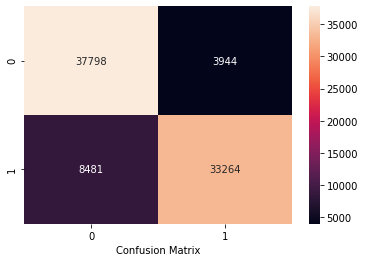

In [ ]:
sns.heatmap(confusion_matrix(y_train_fs_rf,y_pred_train_fs_rf),annot=True,fmt='.8g')
plt.xlabel('Confusion Matrix')

# Grid search - RF

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(3,15,2)
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.4min finished


Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 13} 



In [ ]:
## best -  'criterion': 'gini', 'max_depth': 13

In [ ]:
tuned_paramaters = [{'max_depth': range(12,20,1)
                    }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='gini')
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.2min finished


Best parameters for random forest classifier:  {'max_depth': 19} 



In [ ]:
#Best parameters for random forest classifier:  {'max_depth': 19}

In [ ]:
tuned_paramaters = [{'max_features': ['sqrt', 'log2'],'min_samples_split': range(2,21,2)
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='gini',max_depth=19)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 21.2min finished


Best parameters for random forest classifier:  {'max_features': 'sqrt', 'min_samples_split': 18} 



In [ ]:
#Best parameters for random forest classifier:  {'max_features': 'sqrt', 'min_samples_split': 18}

In [ ]:
tuned_paramaters = [{'min_samples_split': [17,18,19]
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='gini',max_depth=19,max_features='sqrt')
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished


Best parameters for random forest classifier:  {'min_samples_split': 17} 



In [ ]:
#Best parameters for random forest classifier:  {'min_samples_split': 17}

In [ ]:
tuned_paramaters = [{'min_samples_leaf': range(2,21,2),'max_leaf_nodes': range(2,21,2)
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='gini',max_depth=19,max_features='sqrt',
                                                      min_samples_split=17)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 57.6min finished


Best parameters for random forest classifier:  {'max_leaf_nodes': 20, 'min_samples_leaf': 20} 



In [ ]:
#Best parameters for random forest classifier:  {'max_leaf_nodes': 20, 'min_samples_leaf': 20}

In [ ]:
tuned_paramaters = [{'min_samples_leaf': [19,20,21],'max_leaf_nodes': [19,20,21]
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,n_estimators=500,criterion='gini',max_depth=19,max_features='sqrt',
                                                      min_samples_split=17)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.9min finished


Best parameters for random forest classifier:  {'max_leaf_nodes': 20, 'min_samples_leaf': 19} 



In [ ]:
#Best parameters for random forest classifier:  {'max_leaf_nodes': 20, 'min_samples_leaf': 19}

In [ ]:
tuned_paramaters = [{'n_estimators': [200,400,600,800,1000]
                     }]
random_forest_classification = RandomForestClassifier(random_state=10,criterion='gini',max_depth=19,max_features='sqrt',
                                                      max_leaf_nodes = 20,min_samples_leaf = 19, min_samples_split=17)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       scoring='precision',n_jobs=-1, cv=5,verbose=1
                       )
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.9min finished


Best parameters for random forest classifier:  {'n_estimators': 1000} 



In [ ]:
#Best parameters for random forest classifier:  {'n_estimators': 1000}

In [ ]:
tuned_paramaters = [{'n_estimators': [900,950,1000]
}]
random_forest_classification = RandomForestClassifier(random_state=10,criterion='gini',max_depth=19,max_features='sqrt',
                                                      max_leaf_nodes = 20,min_samples_leaf = 19, min_samples_split=17)
rf_grid_fac = GridSearchCV(estimator = random_forest_classification,
param_grid = tuned_paramaters,
scoring='precision',n_jobs=-1, cv=5,verbose=1
)
rf_grid_model_fac = rf_grid_fac.fit(X_train_rf, y_train_rf)
print('Best parameters for random forest classifier: ', rf_grid_model_fac.best_params_, '\n')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.8min finished


Best parameters for random forest classifier:  {'n_estimators': 1000} 



In [ ]:
# Model

In [ ]:
rf_classification = RandomForestClassifier(random_state=10,criterion='gini',max_depth=19,max_features='sqrt',
                                                      max_leaf_nodes = 20,min_samples_leaf = 19, min_samples_split=17,n_estimators = 1000)
rf_model_fac = rf_classification.fit(X_train_rf, y_train_rf)

In [ ]:
y_pred=rf_model_fac.predict(X_test_rf)
print('confusion_matrix:\n',confusion_matrix(y_test_rf,y_pred))
print(accuracy_score(y_test_rf,y_pred))
print(f1_score(y_test_rf,y_pred))
print(recall_score(y_test_rf,y_pred))
print(classification_report(y_test_rf,y_pred))

confusion_matrix:
 [[11649  2265]
 [ 3017 10898]]
0.8101979948974092
0.8049338946746437
0.7831836148041682
              precision    recall  f1-score   support

           0       0.79      0.84      0.82     13914
           1       0.83      0.78      0.80     13915

    accuracy                           0.81     27829
   macro avg       0.81      0.81      0.81     27829
weighted avg       0.81      0.81      0.81     27829



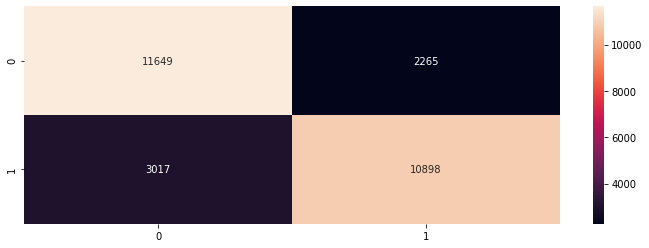

In [ ]:
sns.heatmap(confusion_matrix(y_test_rf,y_pred),annot=True,fmt='.8g')

In [ ]:
y_pred_train=rf_model_fac.predict(X_train_rf)
print('confusion_matrix:\n',confusion_matrix(y_train_rf,y_pred_train))
print(accuracy_score(y_train_rf,y_pred_train))
print(f1_score(y_train_rf,y_pred_train))
print(recall_score(y_train_rf,y_pred_train))
print(classification_report(y_train_rf,y_pred_train))

confusion_matrix:
 [[34679  7063]
 [ 8712 33033]]
0.8110484267011631
0.8072482007795604
0.7913043478260869
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     41742
           1       0.82      0.79      0.81     41745

    accuracy                           0.81     83487
   macro avg       0.81      0.81      0.81     83487
weighted avg       0.81      0.81      0.81     83487



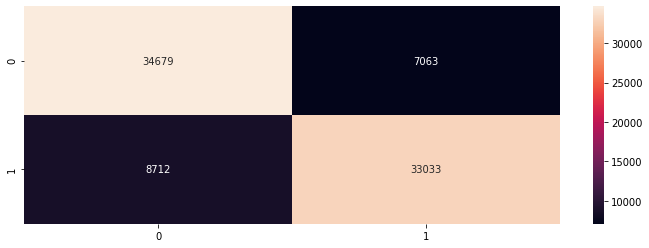

In [ ]:
sns.heatmap(confusion_matrix(y_train_rf,y_pred_train),annot=True,fmt='.8g')